<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/SHIFT/202305/T37_AULA7_Cluster_RF_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 7 
# Clusterização - Aprendizagem Não-Supervisionada

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")

<Axes: xlabel='wt', ylabel='mpg'>

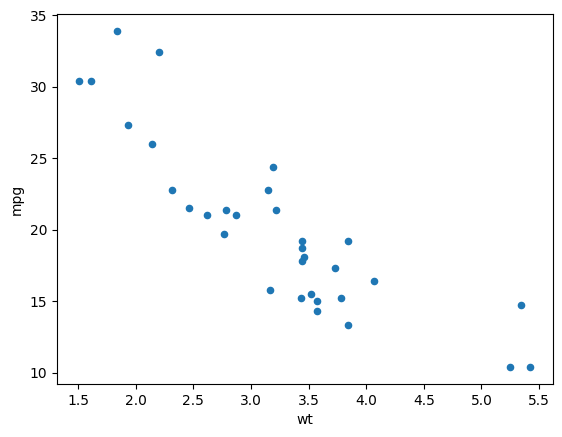

In [5]:
df.plot.scatter(x='wt', y='mpg')

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
df['mpg01'], df['wt01'] = scaler.fit_transform(df[['mpg']]),  scaler.fit_transform(df[['wt']])

In [37]:
k = KMeans(n_clusters=4, random_state=1).fit(df[['mpg01','wt01']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='wt', ylabel='mpg'>

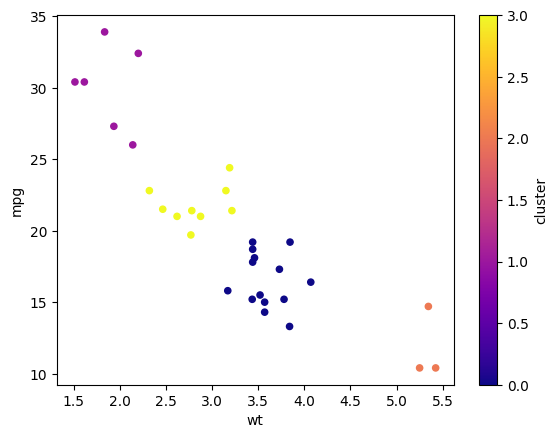

In [38]:
df['cluster'] = k.labels_
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='plasma')

Mais algoritmos

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# 1.Carga de Dados
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')

# 2. Análise exploratória
# Construção Dummy Sex
dummies_Sex = pd.get_dummies(df['Sex'])
df['SexFemale'] = dummies_Sex['female']
# Construção Dummy Pclass
dummies_Pclass = pd.get_dummies(df['Pclass'], prefix='c')
df['Pclass1'] = dummies_Pclass['c_1']
df['Pclass2'] = dummies_Pclass['c_2']

# Tratamento de dados - preenchimento de idades nulas
ageMed = df['Age'].mean()
df['Age'] = df['Age'].fillna(ageMed)

# 3. Separação de Treino e Teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split( df[['SexFemale','Age','Pclass1', 'Pclass2']], df['Survived'], test_size=0.25, random_state=1 )


# 4. model
mod = RandomForestClassifier(random_state=1, n_estimators=200, bootstrap=True)
#mod = svm.SVC()
mod = mod.fit(X_treino, Y_treino)

# 5. Previsão
Y_prev = mod.predict(X_teste)

# Avaliação de previsões em classificadores
pd.crosstab(Y_prev, Y_teste, margins=True)

Survived,0,1,All
row_0,,,
0,112,32,144
1,16,63,79
All,128,95,223


In [59]:
print(accuracy_score(Y_teste, Y_prev) )
print(precision_score(Y_teste, Y_prev) )
print(recall_score(Y_teste, Y_prev) )

0.7847533632286996
0.7974683544303798
0.6631578947368421
